In [1]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#from torch.utils.data import Dataset, DataLoader
#from torchvision import transforms, utils
import warnings
warnings.filterwarnings("ignore",category=UserWarning)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

train = np.loadtxt(open(r"data\train.txt"))
test = np.loadtxt(open(r"data\test.txt"))

X_train = train[:,1:]
print(X_train.shape)
y_train = train[:,0:1]
print(X_train[2])

X_test = test[:,1:]
y_test = test[:,0:1]

(7291, 256)
[-1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.996
  0.147  1.    -0.189 -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -1.    -1.    -0.882  1.     0.39  -0.811 -1.
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -0.715  1.     0.029 -1.    -1.    -1.    -1.    -1.    -1.
 -1.    -1.    -0.888 -0.912 -1.    -1.    -1.    -0.549  1.     0.361
 -1.    -1.    -1.    -1.    -1.    -1.    -1.    -0.938  0.694  0.057
 -1.    -1.    -1.    -0.382  1.     0.511 -1.    -1.    -1.    -1.
 -1.    -1.    -1.    -0.311  1.    -0.043 -1.    -1.    -1.    -0.648
  1.     0.644 -1.    -1.    -1.    -1.    -1.    -1.    -1.     0.489
  1.    -0.493 -1.    -1.    -1.    -0.564  1.     0.693 -1.    -1.
 -1.    -1.    -1.    -1.    -0.966  0.988  1.    -0.893 -1.    -1.
 -1.    -0.397  1.     0.903 -0.977 -1.    -1.    -1.    -1.    -1.
 -0.559  1.     1.    -0.297 -1.    -1.    -1.    -0.611  1.     0.873
 -0.698 -0.552 -1.

In [3]:

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils


class CustomDigitDataset(Dataset):
   
    def __init__(self, samples,labels,transform=None):
        self.labels = labels
        
        self.samples = samples
        self.trans=transform
    def __len__(self):
            return len(self.labels)
    def __getitem__(self,idx):
        if self.trans is not None:
            label = np.array(self.trans(self.labels[idx]))
            sample = np.array(self.trans(self.samples[idx]))
            return label, sample
        else:
            
            label = np.array(self.labels[idx])
            sample = np.array(self.samples[idx])
            return label, sample
trainDataset = CustomDigitDataset(X_train,y_train)
testDataset = CustomDigitDataset(X_test,y_test)


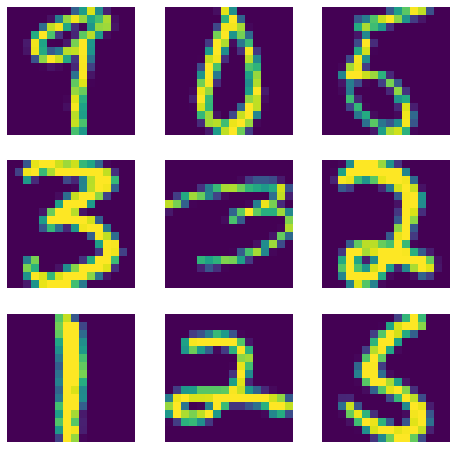

In [4]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainDataset), size=(1,)).item()
    label, text = trainDataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    
    plt.axis("off")
    aaa=np.reshape(text,(16,16))
    plt.imshow(aaa)
plt.show()

In [5]:


train_dataloader = torch.utils.data.DataLoader(trainDataset, batch_size=64, shuffle=True, num_workers=4)
test_dataloader = torch.utils.data.DataLoader(testDataset, batch_size=64, shuffle=True,num_workers=4)

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


# definition-2: The proposed way to define NNs in PyTorch 
#here are different activation functions

# always inherit from nn.Module
class DigitNet(nn.Module): 
  def __init__(self,activation='sigmoid'):
        #instance of the nn module
        super(DigitNet, self).__init__()
        self.layer1 = nn.Linear(16 * 16, 200)
        self.layer2 = nn.Linear(200, 200)
        self.layer3 = nn.Linear(200,100)
        self.layer4 = nn.Linear(100, 10)
        if activation == 'sigmoid':
          self.a = nn.Sigmoid()
        else:
          self.a = nn.ReLU()
        #10 is the number of classes       
      # this would also do the job
      # self.t = nn.Sequenntial(self.f, self. a)
          
  # the forward pass of info through the net
  #Now we’ve setup the “skeleton” of our network architecture, we have to define how data flows through out network.
  def forward(self, Data): 
      Data = F.a(self.layer1(Data))
      Data = F.a(self.layer2(Data))
      Data = F.a(self.layer3(Data))
      Data = self.layer4(Data)
      return F.log_softmax(Data)

net = DigitNet()
print(net)

In [ ]:
import torch
learning_rate=0.01
epochs=10
log_interval = 10
# create a stochastic gradient descent optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
# create a loss function
criterion = nn.NLLLoss()






In [ ]:
for batch_idx, (data, target) in enumerate(train_dataloader):
        print(batch_idx)

In [ ]:
from torch.autograd import Variable
# run the main training loop
for epoch in range(epochs):
    print(epoch)
    for batch_idx, (target, data) in enumerate(train_dataloader):
        print(batch_idx)
        data, target = Variable(data), Variable(target)
        # resize data from (batch_size, 1, 16, 16) to (batch_size, 16*16)
        data = data.view(-1, 16*16)
       # optimizer.zero_grad()
       # net_out = net(data)
       # loss = criterion(net_out, target)
       # loss.backward()
        #optimizer.step()
        if batch_idx % log_interval == 0:
            print("ok")
           # print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
              #      epoch, batch_idx * len(data), len(train_dataloader.dataset),
               #            100. * batch_idx / len(train_dataloader), loss.data[0]))